In [1]:
import pandas as pd
df = pd.read_csv(r'd:\Desktop\reports\datasets\course_review\reviews.csv')
df

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4
...,...,...,...
107013,107013,Trendy topic with talks from expertises in the...,4
107014,107014,"Wonderful! Simple and clear language, good ins...",5
107015,107015,an interesting and fun course. thanks. dr quincy,5
107016,107016,"very broad perspective, up to date information...",4


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import re
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
df.drop(columns=['Id'] , inplace= True)

df.head()

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4


In [7]:
y = df['Label']
X = df['Review']
df

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
107013,Trendy topic with talks from expertises in the...,4
107014,"Wonderful! Simple and clear language, good ins...",5
107015,an interesting and fun course. thanks. dr quincy,5
107016,"very broad perspective, up to date information...",4


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [9]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    # Remove URLs, emails, and special characters
    text = re.sub(r'http\S+|www.\S+|[^a-zA-Z\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words, but keep 'not'
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered_tokens)


In [12]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [13]:
X = X.apply(preprocess_text)
X

0                                          good interesting
1         class helpful currently im still learning clas...
2         likeprof tas helpful discussion among students...
3         easy follow includes lot basic important techn...
4             really nice teacheri could got point eazliy v
                                ...                        
107013    trendy topic talks expertises field covered ar...
107014    wonderful simple clear language good instructo...
107015              interesting fun course thanks dr quincy
107016    broad perspective date information useful link...
107017    informative course social financial implicatio...
Name: Review, Length: 107018, dtype: object

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [15]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a given text
def get_bert_embedding(text):
    # Tokenize the text and add special tokens
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    
    # Get the hidden states from BERT
    with torch.no_grad():
        outputs = model(**inputs)
    hidden_states = outputs.last_hidden_state

    # Get the embeddings for the [CLS] token (the first token)
    cls_embedding = hidden_states[:, 0, :].squeeze().numpy()
    return cls_embedding

# Apply BERT embeddings on the 'Review' column
bert_embeddings = df['Review'].apply(get_bert_embedding)

# Convert the embeddings to a DataFrame
bert_df = pd.DataFrame(bert_embeddings.tolist())

# Concatenate the original DataFrame with the BERT embeddings DataFrame
df = pd.concat([df, bert_df], axis=1)

print(df)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                                   Review  Label         0  \
0                                    good and interesting      5 -0.236551   
1       This class is very helpful to me. Currently, I...      5 -0.165805   
2       like!Prof and TAs are helpful and the discussi...      5 -0.076225   
3       Easy to follow and includes a lot basic and im...      5 -0.828735   
4       Really nice teacher!I could got the point eazl...      4 -0.196644   
...                                                   ...    ...       ...   
107013  Trendy topic with talks from expertises in the...      4 -0.430061   
107014  Wonderful! Simple and clear language, good ins...      5 -0.347811   
107015   an interesting and fun course. thanks. dr quincy      5  0.036779   
107016  very broad perspective, up to date information...      4 -0.160105   
107017  An informative course on the social and financ...      4 -0.474148   

               1         2         3         4         5       

In [17]:
!pip install torch

In [18]:
df.head()

,Review,Label,0,1,2,3,4,5,6,7,...,758,759,760,761,762,763,764,765,766,767
0,good and interesting,5,-0.236551,0.241676,-0.315652,0.003984,-0.374297,-0.258266,-0.045228,0.423193,...,0.214284,-0.256070,-0.121305,0.072664,0.125058,-0.010168,-0.266723,-0.126205,0.309708,0.235852
1,"This class is very helpful to me. Currently, I...",5,-0.165805,0.064585,-0.106176,-0.334328,-0.221211,-0.470751,0.279137,1.014086,...,-0.142778,-0.403872,0.058048,-0.141052,0.209501,-0.094118,0.009455,-0.223304,0.285965,0.381404
2,like!Prof and TAs are helpful and the discussi...,5,-0.076225,0.020943,0.102044,-0.080749,-0.489581,-0.717040,0.600992,0.610253,...,-0.211876,-0.348791,0.258021,-0.168289,-0.176192,-0.130354,-0.538171,-0.196534,0.419570,0.291504
3,Easy to follow and includes a lot basic and im...,5,-0.828735,-0.378927,0.340434,-0.220283,-0.095646,-0.830671,-0.255918,0.369705,...,-0.139205,-0.518142,0.058061,-0.341907,0.040316,-0.070512,-0.230776,-0.045896,-0.115607,0.772087
4,Really nice teacher!I could got the point eazl...,4,-0.196644,0.116039,0.128183,0.108464,-0.569489,-0.298878,0.180447,0.201791,...,-0.065315,-0.154498,0.250088,-0.065448,0.034870,-0.084046,0.036266,-0.262028,0.368669,0.615483


In [19]:
df.drop(columns=['Review'] , inplace= True)

df.head()

,Label,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,5,-0.236551,0.241676,-0.315652,0.003984,-0.374297,-0.258266,-0.045228,0.423193,-0.032990,...,0.214284,-0.256070,-0.121305,0.072664,0.125058,-0.010168,-0.266723,-0.126205,0.309708,0.235852
1,5,-0.165805,0.064585,-0.106176,-0.334328,-0.221211,-0.470751,0.279137,1.014086,-0.107390,...,-0.142778,-0.403872,0.058048,-0.141052,0.209501,-0.094118,0.009455,-0.223304,0.285965,0.381404
2,5,-0.076225,0.020943,0.102044,-0.080749,-0.489581,-0.717040,0.600992,0.610253,0.257312,...,-0.211876,-0.348791,0.258021,-0.168289,-0.176192,-0.130354,-0.538171,-0.196534,0.419570,0.291504
3,5,-0.828735,-0.378927,0.340434,-0.220283,-0.095646,-0.830671,-0.255918,0.369705,0.230426,...,-0.139205,-0.518142,0.058061,-0.341907,0.040316,-0.070512,-0.230776,-0.045896,-0.115607,0.772087
4,4,-0.196644,0.116039,0.128183,0.108464,-0.569489,-0.298878,0.180447,0.201791,0.121504,...,-0.065315,-0.154498,0.250088,-0.065448,0.034870,-0.084046,0.036266,-0.262028,0.368669,0.615483


In [20]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Sample a smaller subset of the data
df_sampled = df.sample(frac=0.1, random_state=42)

y = df_sampled['Label']
X = df_sampled.drop(columns=['Label'])

# Optimize data types
X = X.astype('float32')

# Apply SMOTE to resample the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Label')], axis=1)

# Print the original and resampled label distributions
print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

# If you want to see the label count in DataFrame format
original_label_count = df_sampled['Label'].value_counts()
resampled_label_count = resampled_df['Label'].value_counts()

print("Original Label Counts:\n", original_label_count)
print("Resampled Label Counts:\n", resampled_label_count)

Original dataset shape: Counter({5: 7992, 4: 1756, 3: 468, 2: 248, 1: 238})
Resampled dataset shape: Counter({4: 7992, 5: 7992, 2: 7992, 3: 7992, 1: 7992})
Original Label Counts:
 Label
5    7992
4    1756
3     468
2     248
1     238
Name: count, dtype: int64
Resampled Label Counts:
 Label
4    7992
5    7992
2    7992
3    7992
1    7992
Name: count, dtype: int64


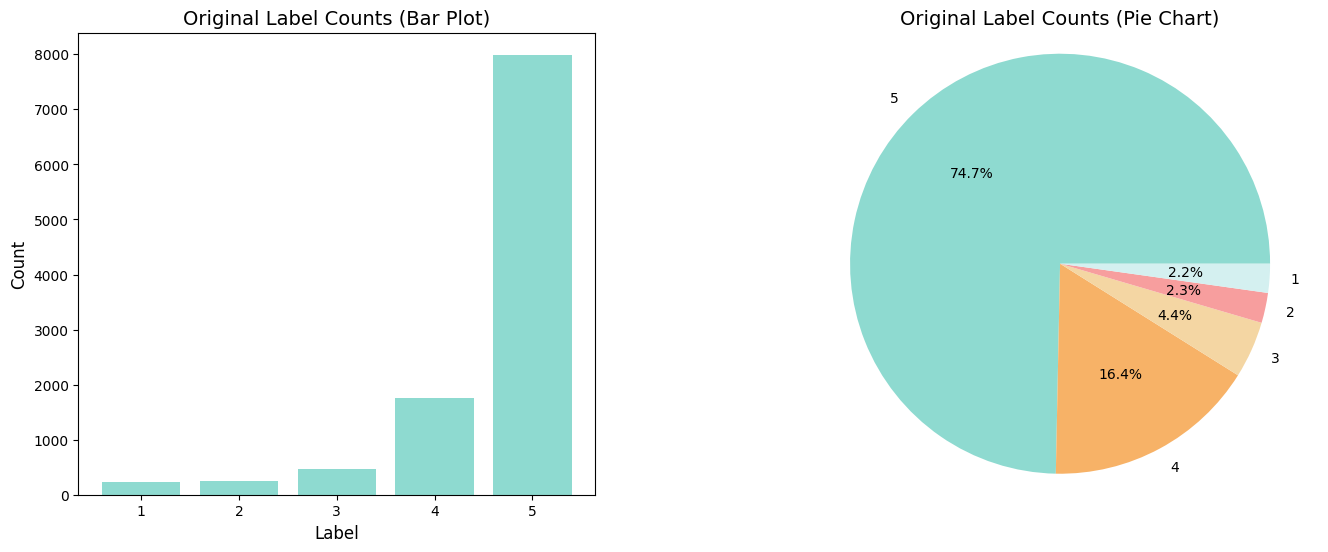

In [65]:
import matplotlib.pyplot as plt
from collections import Counter

# Original dataset label counts
original_labels = [5, 4, 3, 2, 1]
original_counts = [7992, 1756, 468, 248, 238]

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
ax1.bar(original_labels, original_counts, color='#8EDAD0')
ax1.set_title('Original Label Counts (Bar Plot)', fontsize=14)
ax1.set_xlabel('Label', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Pie chart
ax2.pie(original_counts, labels=original_labels, autopct='%1.1f%%', colors=['#8EDAD0', '#F7B267', '#F4D6A3', '#F79E9E', '#D4F0F0'])
ax2.set_title('Original Label Counts (Pie Chart)', fontsize=14)
ax2.axis('equal')

# Adjust the spacing
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

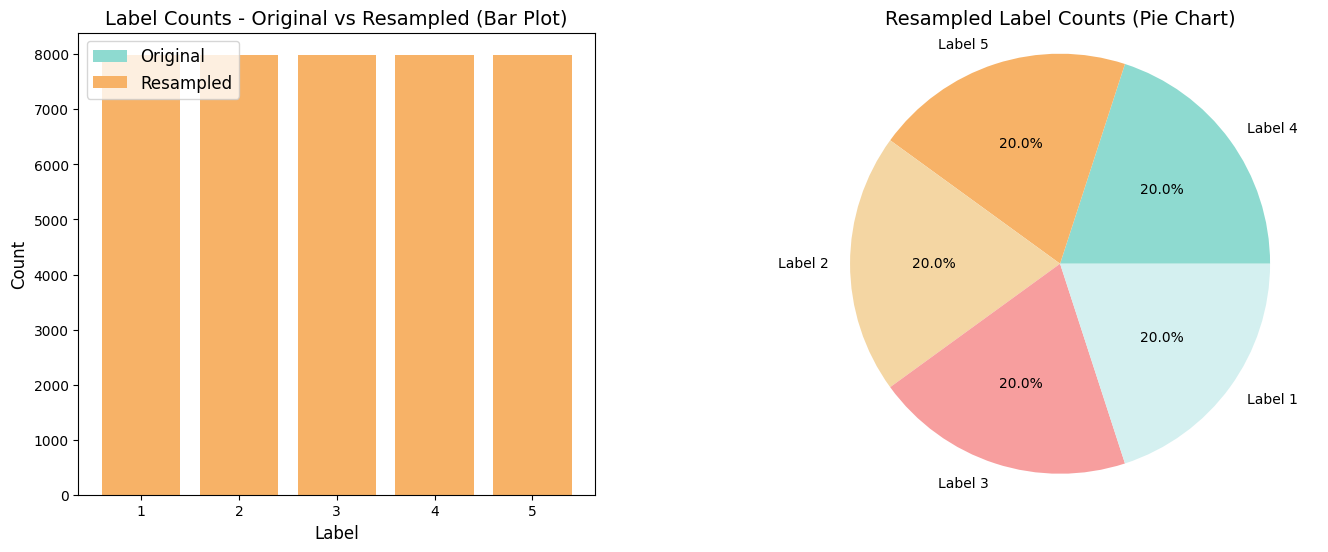

In [67]:
import matplotlib.pyplot as plt
from collections import Counter

# Original dataset label counts
original_labels = [5, 4, 3, 2, 1]
original_counts = [7992, 1756, 468, 248, 238]

# Resampled dataset label counts
resampled_labels = [4, 5, 2, 3, 1]
resampled_counts = [7992, 7992, 7992, 7992, 7992]

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
ax1.bar(original_labels, original_counts, color='#8EDAD0', label='Original')
ax1.bar(resampled_labels, resampled_counts, color='#F7B267', label='Resampled')
ax1.set_title('Label Counts - Original vs Resampled (Bar Plot)', fontsize=14)
ax1.set_xlabel('Label', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)

# Pie chart
labels = ['Label 4', 'Label 5', 'Label 2', 'Label 3', 'Label 1']
ax2.pie([resampled_counts[i] for i in [1, 0, 3, 2, 4]], labels=labels, autopct='%1.1f%%', colors=['#8EDAD0', '#F7B267', '#F4D6A3', '#F79E9E', '#D4F0F0'])
ax2.set_title('Resampled Label Counts (Pie Chart)', fontsize=14)
ax2.axis('equal')

# Adjust the spacing
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np

# Assuming resampled_df is your DataFrame after balancing
# Verify the columns in the DataFrame
print("Columns in DataFrame:", resampled_df.columns)

# Ensure the DataFrame contains the 'Label' column
if 'Label' not in resampled_df.columns:
    raise ValueError("The DataFrame does not contain 'Label' column")

# Separate the features and labels
y = resampled_df['Label']
X = resampled_df.drop(columns=['Label'])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create an SVC with specified hyperparameters
classifier = SVC(C=1.0, kernel='rbf', random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Compute and print the accuracy, precision, recall, and F1-score for the training set
print("Training set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=['1', '2', '3', '4', '5']))

# Compute and print the accuracy, precision, recall, and F1-score for the testing set
print("Testing set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_test, y_test_pred) * 100)
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['1', '2', '3', '4', '5']))

Columns in DataFrame: Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           759,     760,     761,     762,     763,     764,     765,     766,
           767, 'Label'],
      dtype='object', length=769)
Training set results:
Accuracy (in %): 86.71483983983984
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.99      0.97      6393
           2       0.93      0.97      0.95      6394
           3       0.87      0.88      0.88      6394
           4       0.79      0.65      0.71      6393
           5       0.78      0.84      0.81      6394

    accuracy                           0.87     31968
   macro avg       0.86      0.87      0.86     31968
weighted avg       0.86      0.87      0.86     31968

Testing set results:
Accuracy (in %): 85.98598598598599
Classification Report:
              precision    recall  f1-score   support

           1       0.

Columns in DataFrame: Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           759,     760,     761,     762,     763,     764,     765,     766,
           767, 'Label'],
      dtype='object', length=769)


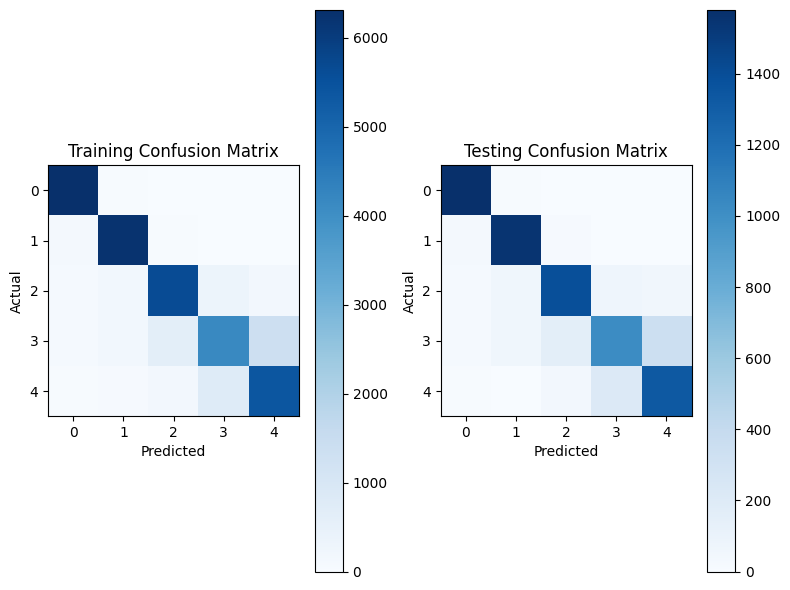

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming resampled_df is your DataFrame after balancing
# Verify the columns in the DataFrame
print("Columns in DataFrame:", resampled_df.columns)

# Ensure the DataFrame contains the 'Label' column
if 'Label' not in resampled_df.columns:
    raise ValueError("The DataFrame does not contain 'Label' column")

# Separate the features and labels
y = resampled_df['Label']
X = resampled_df.drop(columns=['Label'])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create an SVC with specified hyperparameters
classifier = SVC(C=1.0, kernel='rbf', random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Compute the confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))

# Plot the training confusion matrix
plt.subplot(1, 2, 1)
plt.imshow(train_cm, cmap='Blues')
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()

# Plot the testing confusion matrix
plt.subplot(1, 2, 2)
plt.imshow(test_cm, cmap='Blues')
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()

plt.tight_layout()
plt.show()

In [33]:
pip install matplotlib


     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.5 kB 262.6 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.5 kB 281.8 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.5 kB 403.5 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.5 kB 437.6 kB/s eta 0:00:01
     -----------------------------------  163.8/165.5 kB 546.6 kB/s eta 0:00:01
     -----------------------------------  163.8/165.5 kB 546.6 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 432.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 648.1 kB/s eta 0:00:13
  


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
# New texts to predict
new_texts = [
    "This course is amazing! I love it.",
    "The course was terrible, never register in it again",
    "not good and not bad",
    'nice',
    'fuck this course it is suck',
    'i dont love it but it is helpfull',
    'it is booring but not bad very much',
    'it is not bad but it is booring',
    'it is suck course',
    'it is not bad very much',
]

# Get BERT embeddings for the new texts
new_embeddings = [get_bert_embedding(text) for text in new_texts]

# Convert the embeddings to a DataFrame
X_new_df = pd.DataFrame(new_embeddings)

# Predict using the model
predictions = classifier.predict(X_new_df)

# Print the results
for text, label in zip(new_texts, predictions):
    print(f"Text: {text}")
    print(f"Predicted Label: {label}")
    print()

Text: This course is amazing! I love it.
Predicted Label: 5

Text: The course was terrible, never register in it again
Predicted Label: 1

Text: not good and not bad
Predicted Label: 3

Text: nice
Predicted Label: 5

Text: fuck this course it is suck
Predicted Label: 1

Text: i dont love it but it is helpfull
Predicted Label: 4

Text: it is booring but not bad very much
Predicted Label: 3

Text: it is not bad but it is booring
Predicted Label: 3

Text: it is suck course
Predicted Label: 1

Text: it is not bad very much
Predicted Label: 3



In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np

# Assuming resampled_df is your DataFrame after balancing
# Verify the columns in the DataFrame
print("Columns in DataFrame:", resampled_df.columns)

# Ensure the DataFrame contains the 'Label' column
if 'Label' not in resampled_df.columns:
    raise ValueError("The DataFrame does not contain 'Label' column")

# Separate the features and labels
X = resampled_df.drop(columns=['Label'])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Parameters
batch_size = 10000  # Adjust batch size according to your memory constraints

# Create a Gradient Boosting Classifier with specified hyperparameters
classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict for train data
y_train_pred = classifier.predict(X_train)

# Predict for test data
y_test_pred = classifier.predict(X_test)

# Compute and print the accuracy, precision, recall, and F1-score for the training set
print("Training set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=['1', '2', '3', '4', '5']))

# Compute and print the accuracy, precision, recall, and F1-score for the testing set
print("Testing set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_test, y_test_pred) * 100)
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['1', '2', '3', '4', '5']))

Columns in DataFrame: Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           759,     760,     761,     762,     763,     764,     765,     766,
           767, 'Label'],
      dtype='object', length=769)
Training set results:
Accuracy (in %): 88.24136636636636
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.98      0.97      6393
           2       0.95      0.97      0.96      6394
           3       0.88      0.91      0.89      6394
           4       0.79      0.73      0.76      6393
           5       0.83      0.82      0.83      6394

    accuracy                           0.88     31968
   macro avg       0.88      0.88      0.88     31968
weighted avg       0.88      0.88      0.88     31968

Testing set results:
Accuracy (in %): 84.496996996997
Classification Report:
              precision    recall  f1-score   support

           1       0.93

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np


# Separate the features and labels
y = resampled_df['Label']
X = resampled_df.drop(columns=['Label'])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to process data in batches
def batch_generator(X, y, batch_size):
    n_samples = X.shape[0]
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        yield X[start:end], y[start:end]

# Parameters
batch_size = 10000  # Adjust batch size according to your memory constraints

# Create a Multi-Layer Perceptron (MLP) Classifier with specified hyperparameters
classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=100,
    random_state=42)

# Train the classifier in batches
for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
    classifier.partial_fit(X_batch, y_batch, classes=np.unique(y))

# Predict in batches for train data
y_train_pred = np.concatenate([
    classifier.predict(X_batch)
    for X_batch, _ in batch_generator(X_train, y_train, batch_size)
])

# Predict in batches for test data
y_test_pred = np.concatenate([
    classifier.predict(X_batch)
    for X_batch, _ in batch_generator(X_test, y_test, batch_size)
])

# Compute and print the accuracy, precision, recall, and F1-score for the training set
print("Training set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=['1', '2', '3', '4', '5']))

# Compute and print the accuracy, precision, recall, and F1-score for the testing set
print("Testing set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_test, y_test_pred) * 100)
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['1', '2', '3', '4', '5']))


Training set results:
Accuracy (in %): 69.85735735735736
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.83      0.85      6393
           2       0.76      0.81      0.78      6394
           3       0.61      0.74      0.67      6394
           4       0.63      0.30      0.40      6393
           5       0.63      0.81      0.71      6394

    accuracy                           0.70     31968
   macro avg       0.70      0.70      0.68     31968
weighted avg       0.70      0.70      0.68     31968

Testing set results:
Accuracy (in %): 69.40690690690691
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.84      0.84      1599
           2       0.75      0.79      0.77      1598
           3       0.61      0.74      0.67      1598
           4       0.62      0.29      0.39      1599
           5       0.63      0.81      0.71      1598

    accuracy              

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np


# Separate the features and labels
y = resampled_df['Label']
X = resampled_df.drop(columns=['Label'])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to process data in batches
def batch_generator(X, y, batch_size):
    n_samples = X.shape[0]
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        yield X[start:end], y[start:end]

# Parameters
batch_size = 10000  # Adjust batch size according to your memory constraints

# Create a Multi-Layer Perceptron (MLP) Classifier with specified hyperparameters
classifier = MLPClassifier(
    hidden_layer_sizes=(100, 100),
    activation='relu',
    solver='adam',
    max_iter=100,
    random_state=42)

# Train the classifier in batches
for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
    classifier.partial_fit(X_batch, y_batch, classes=np.unique(y))

# Predict in batches for train data
y_train_pred = np.concatenate([
    classifier.predict(X_batch)
    for X_batch, _ in batch_generator(X_train, y_train, batch_size)
])

# Predict in batches for test data
y_test_pred = np.concatenate([
    classifier.predict(X_batch)
    for X_batch, _ in batch_generator(X_test, y_test, batch_size)
])

# Compute and print the accuracy, precision, recall, and F1-score for the training set
print("Training set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=['1', '2', '3', '4', '5']))

# Compute and print the accuracy, precision, recall, and F1-score for the testing set
print("Testing set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_test, y_test_pred) * 100)
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['1', '2', '3', '4', '5']))

Training set results:
Accuracy (in %): 71.81869369369369
Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.86      0.86      6393
           2       0.71      0.87      0.78      6394
           3       0.71      0.68      0.69      6394
           4       0.61      0.45      0.52      6393
           5       0.68      0.73      0.71      6394

    accuracy                           0.72     31968
   macro avg       0.71      0.72      0.71     31968
weighted avg       0.71      0.72      0.71     31968

Testing set results:
Accuracy (in %): 71.72172172172172
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86      1599
           2       0.71      0.87      0.78      1598
           3       0.72      0.67      0.69      1598
           4       0.60      0.43      0.50      1599
           5       0.68      0.75      0.71      1598

    accuracy              

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np


# Separate the features and labels
y = resampled_df['Label']
X = resampled_df.drop(columns=['Label'])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to process data in batches
def batch_generator(X, y, batch_size):
    n_samples = X.shape[0]
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        yield X[start:end], y[start:end]

# Parameters
batch_size = 10000  # Adjust batch size according to your memory constraints

# Create a Multi-Layer Perceptron (MLP) Classifier with specified hyperparameters
classifier = MLPClassifier(
    hidden_layer_sizes=(200, 150),
    activation='relu',
    solver='adam',
    max_iter=100,
    random_state=42)

# Train the classifier in batches
for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
    classifier.partial_fit(X_batch, y_batch, classes=np.unique(y))

# Predict in batches for train data
y_train_pred = np.concatenate([
    classifier.predict(X_batch)
    for X_batch, _ in batch_generator(X_train, y_train, batch_size)
])

# Predict in batches for test data
y_test_pred = np.concatenate([
    classifier.predict(X_batch)
    for X_batch, _ in batch_generator(X_test, y_test, batch_size)
])

# Compute and print the accuracy, precision, recall, and F1-score for the training set
print("Training set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=['1', '2', '3', '4', '5']))

# Compute and print the accuracy, precision, recall, and F1-score for the testing set
print("Testing set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_test, y_test_pred) * 100)
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['1', '2', '3', '4', '5']))

Training set results:
Accuracy (in %): 74.21796796796797
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.97      0.88      6393
           2       0.88      0.82      0.84      6394
           3       0.70      0.78      0.74      6394
           4       0.65      0.34      0.45      6393
           5       0.66      0.80      0.72      6394

    accuracy                           0.74     31968
   macro avg       0.74      0.74      0.73     31968
weighted avg       0.74      0.74      0.73     31968

Testing set results:
Accuracy (in %): 73.84884884884885
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.97      0.88      1599
           2       0.87      0.82      0.84      1598
           3       0.69      0.78      0.73      1598
           4       0.64      0.32      0.43      1599
           5       0.66      0.81      0.73      1598

    accuracy              

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np


# Separate the features and labels
y = resampled_df['Label']
X = resampled_df.drop(columns=['Label'])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to process data in batches
def batch_generator(X, y, batch_size):
    n_samples = X.shape[0]
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        yield X[start:end], y[start:end]

# Parameters
batch_size = 10000  # Adjust batch size according to your memory constraints

# Create a Multi-Layer Perceptron (MLP) Classifier with specified hyperparameters
classifier = MLPClassifier(
    hidden_layer_sizes=(400, 400),
    activation='relu',
    solver='adam',
    max_iter=100,
    random_state=42)

# Train the classifier in batches
for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
    classifier.partial_fit(X_batch, y_batch, classes=np.unique(y))

# Predict in batches for train data
y_train_pred = np.concatenate([
    classifier.predict(X_batch)
    for X_batch, _ in batch_generator(X_train, y_train, batch_size)
])

# Predict in batches for test data
y_test_pred = np.concatenate([
    classifier.predict(X_batch)
    for X_batch, _ in batch_generator(X_test, y_test, batch_size)
])

# Compute and print the accuracy, precision, recall, and F1-score for the training set
print("Training set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=['1', '2', '3', '4', '5']))

# Compute and print the accuracy, precision, recall, and F1-score for the testing set
print("Testing set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_test, y_test_pred) * 100)
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['1', '2', '3', '4', '5']))

Training set results:
Accuracy (in %): 77.69957457457457
Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.99      0.92      6393
           2       0.94      0.93      0.93      6394
           3       0.78      0.83      0.81      6394
           4       0.76      0.24      0.37      6393
           5       0.60      0.90      0.72      6394

    accuracy                           0.78     31968
   macro avg       0.79      0.78      0.75     31968
weighted avg       0.79      0.78      0.75     31968

Testing set results:
Accuracy (in %): 76.75175175175175
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.98      0.92      1599
           2       0.93      0.92      0.93      1598
           3       0.78      0.81      0.79      1598
           4       0.73      0.22      0.34      1599
           5       0.59      0.90      0.71      1598

    accuracy              

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np

# Assuming resampled_df is your DataFrame after balancing
# Verify the columns in the DataFrame
print("Columns in DataFrame:", resampled_df.columns)

# Ensure the DataFrame contains the 'Label' column
if 'Label' not in resampled_df.columns:
    raise ValueError("The DataFrame does not contain 'Label' column")

# Separate the features and labels
y = resampled_df['Label']
X = resampled_df.drop(columns=['Label'])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create an SVC with specified hyperparameters
classifier = SVC(C=10.0, kernel='rbf', random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Compute and print the accuracy, precision, recall, and F1-score for the training set
print("Training set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=['1', '2', '3', '4', '5']))

# Compute and print the accuracy, precision, recall, and F1-score for the testing set
print("Testing set results:")
print("Accuracy (in %):", metrics.accuracy_score(y_test, y_test_pred) * 100)
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['1', '2', '3', '4', '5']))

Columns in DataFrame: Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           759,     760,     761,     762,     763,     764,     765,     766,
           767, 'Label'],
      dtype='object', length=769)
Training set results:
Accuracy (in %): 96.24937437437437
Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      6393
           2       1.00      0.99      1.00      6394
           3       0.98      1.00      0.99      6394
           4       0.95      0.88      0.91      6393
           5       0.90      0.94      0.92      6394

    accuracy                           0.96     31968
   macro avg       0.96      0.96      0.96     31968
weighted avg       0.96      0.96      0.96     31968

Testing set results:
Accuracy (in %): 94.13163163163163
Classification Report:
              precision    recall  f1-score   support

           1       0.

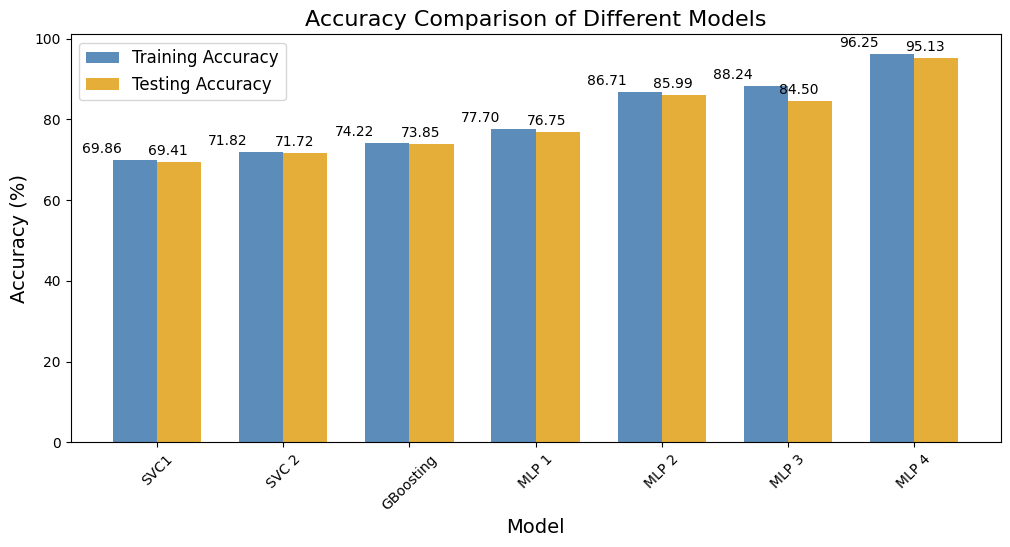

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
models = ['SVC1', 'SVC 2', 'GBoosting', 'MLP 1', 'MLP 2', 'MLP 3', 'MLP 4']
train_acc = [69.86, 71.82, 74.22, 77.70, 86.71, 88.24, 96.25]
test_acc = [69.41, 71.72, 73.85, 76.75, 85.99, 84.50, 95.13]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the training and testing accuracies
x = np.arange(len(models))
width = 0.35

train_bars = ax.bar(x - width/2, train_acc, width, color='#5c8dba', label='Training Accuracy')
test_bars = ax.bar(x + width/2, test_acc, width, color='#e5ae38', label='Testing Accuracy')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.tick_params(axis='x', rotation=45)

# Set the titles and axis labels
ax.set_title('Accuracy Comparison of Different Models', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)

# Add a legend
ax.legend(fontsize=12)

# Add data labels to the bars
for bar, acc in zip(train_bars, train_acc):
    ax.text(bar.get_x() - width/4, acc + 1, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)
for bar, acc in zip(test_bars, test_acc):
    ax.text(bar.get_x() + width/4, acc + 1, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)

# Adjust the spacing
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()

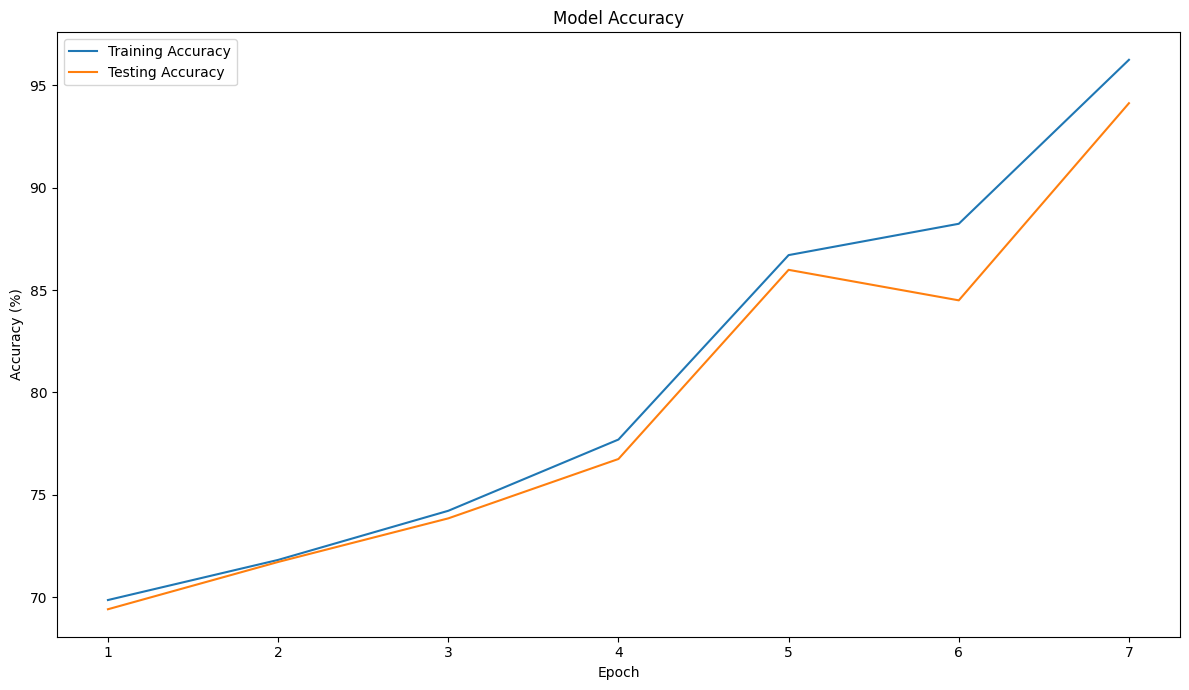

In [59]:
import matplotlib.pyplot as plt

# Assuming you have the following data:
training_accuracies = [69.86, 71.82, 74.22, 77.70, 86.71, 88.24 ,96.25]

testing_accuracies = [69.41, 71.72, 73.85, 76.75, 85.99, 84.50, 94.13]

epochs = [1, 2, 3, 4, 5, 6, 7]

fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.plot(epochs, training_accuracies, label='Training Accuracy')
ax1.plot(epochs, testing_accuracies, label='Testing Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Model Accuracy')
ax1.legend()

plt.tight_layout()
plt.show()

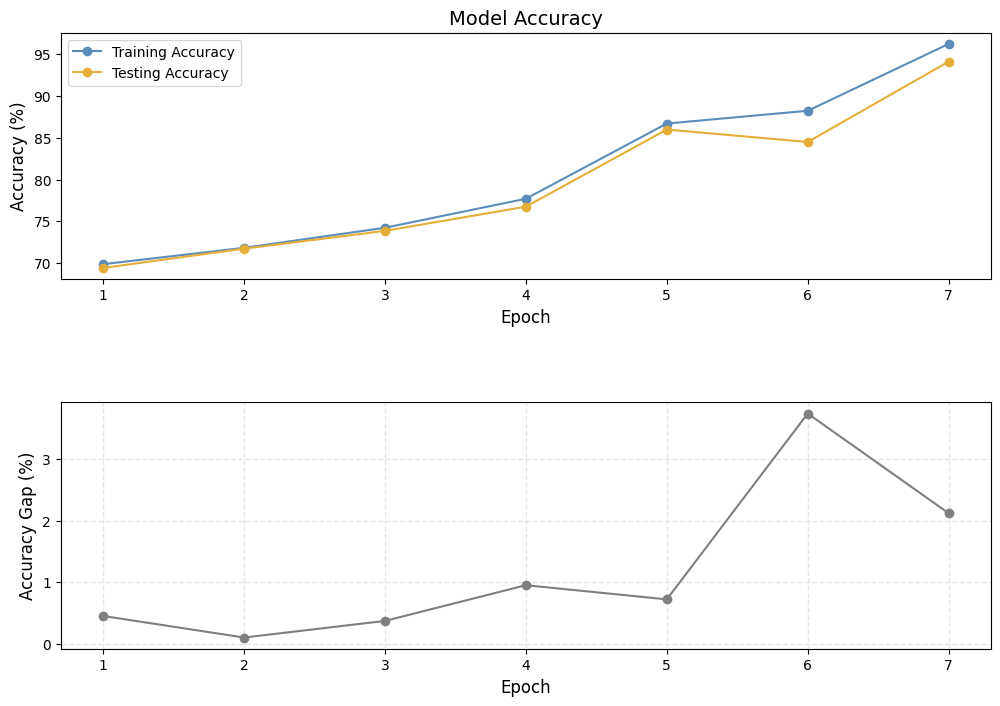

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the following data:
training_accuracies = [69.86, 71.82, 74.22, 77.70, 86.71, 88.24, 96.25]
testing_accuracies = [69.41, 71.72, 73.85, 76.75, 85.99, 84.50, 94.13]
epochs = [1, 2, 3, 4, 5, 6, 7]

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the training and testing accuracies
ax1.plot(epochs, training_accuracies, color='#5c8dba', marker='o', label='Training Accuracy')
ax1.plot(epochs, testing_accuracies, color='#e5ae38', marker='o', label='Testing Accuracy')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy (%)', fontsize=12)
ax1.set_title('Model Accuracy', fontsize=14)
ax1.legend(fontsize=10)

# Add a second y-axis for the accuracy gap
ax2.plot(epochs, np.array(training_accuracies) - np.array(testing_accuracies), color='#7f7f7f', marker='o')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy Gap (%)', fontsize=12)
ax2.grid(True, color='#e5e5e5', linestyle='--', linewidth=1)

# Adjust the spacing
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

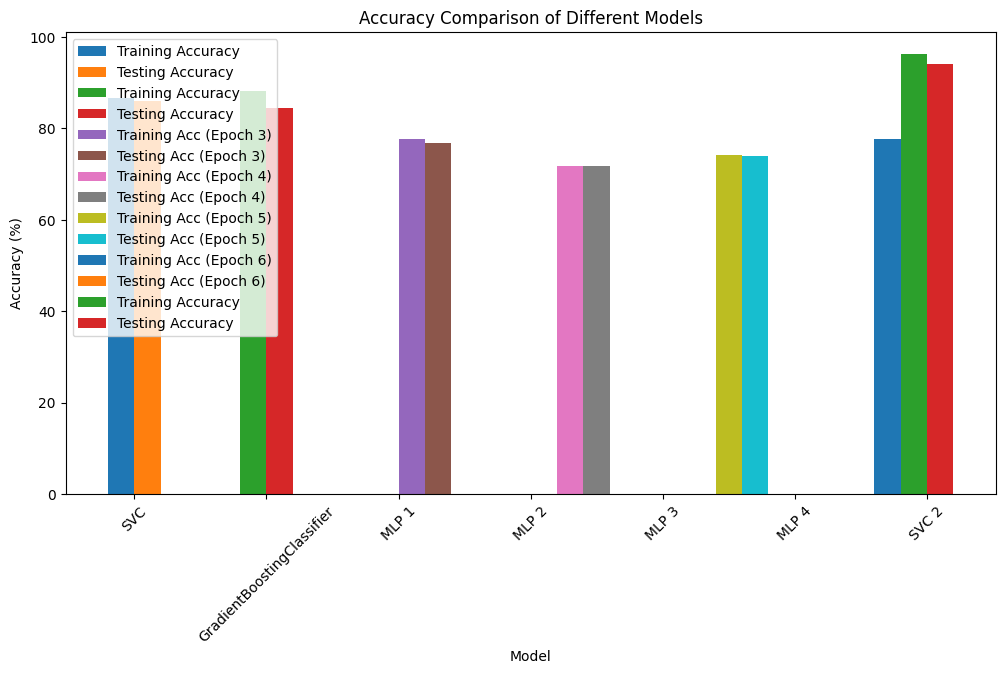

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
models = ['SVC', 'GradientBoostingClassifier', 'MLP 1', 'MLP 2', 'MLP 3', 'MLP 4', 'SVC 2']
train_acc = [86.71, 88.24, [69.86, 71.81, 74.22, 77.70], [71.82, 71.82, 71.82, 71.82], [74.22, 74.22, 74.22, 74.22], [77.70, 77.70, 77.70, 77.70], 96.25]
test_acc = [85.99, 84.50, [69.41, 71.72, 73.85, 76.75], [71.72, 71.72, 71.72, 71.72], [73.85, 73.85, 73.85, 73.85], [76.75, 76.75, 76.75, 76.75], 94.13]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the training and testing accuracies
x = np.arange(len(models))
width = 0.20

for i in range(len(models)):
    if isinstance(train_acc[i], list):
        ax.bar(x[i] - 3 * width / 2 + i * width, train_acc[i], width, label=f'Training Acc (Epoch {i+1})')
        ax.bar(x[i] - width / 2 + i * width, test_acc[i], width, label=f'Testing Acc (Epoch {i+1})')
    else:
        ax.bar(x[i] - width / 2, train_acc[i], width, label='Training Accuracy')
        ax.bar(x[i] + width / 2, test_acc[i], width, label='Testing Accuracy')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.tick_params(axis='x', rotation=45)

# Set the titles and axis labels
ax.set_title('Accuracy Comparison of Different Models')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')

# Add a legend
ax.legend()

# Show the plot
plt.show()

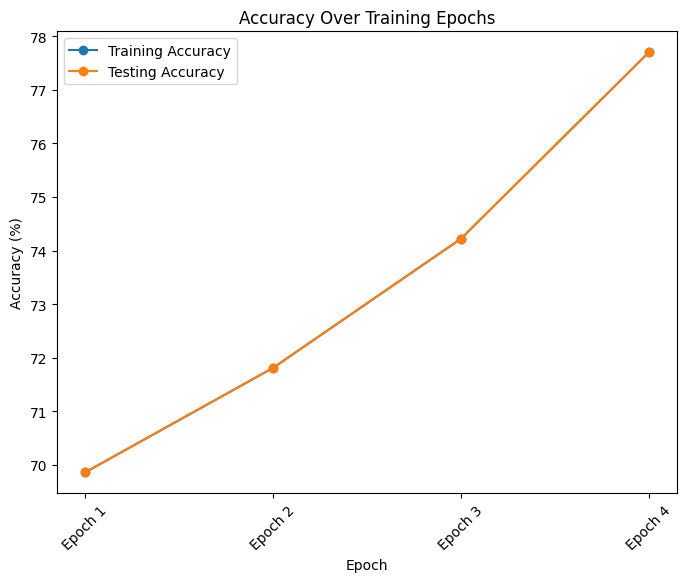

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the accuracy values are stored in a list or DataFrame column
accuracy_values = [69.86, 71.81, 74.22, 77.70]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the training and testing accuracies
x = np.arange(len(accuracy_values))
ax.plot(x, accuracy_values, marker='o', label='Training Accuracy')
ax.plot(x, accuracy_values, marker='o', label='Testing Accuracy')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels([f'Epoch {i+1}' for i in range(len(accuracy_values))])
ax.tick_params(axis='x', rotation=45)

# Set the titles and axis labels
ax.set_title('Accuracy Over Training Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (%)')

# Add a legend
ax.legend()

# Show the plot
plt.show()